# BUSINESS UNDERSTANDING


---



SyriaTel is a Telecommucations company facing a customer churn challenge. The company is interested in reducing the revenue lost in losing valuable customers.

Data analysis will help to describe customer’s behavior, understand their habits, develop appropriate marketing plans for SyriaTel to identify sales transactions and build a long-term loyalty relationship with its customerbase.


# Problem Statement
 Create a machine learning model to classify customers as;

            *   likely to churn
            *   not churn

based given dataset.


# Business Objectives

            *   Minimize churn rate by identifying at-risk customers.
            *   Improve retention through targeted retention strategies.
            *   Increase customer lifetime value by keeping customers longer.
            *   Use cost-effective retention strategies
            *   Targeted Marketing compaigns and promotions to acquire more Customers
            *   Enhance the customer experience to prevent churn.


In [179]:
# importing the necessary libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection and importance
from sklearn.feature_selection import SelectKBest, chi2

# Modelling and algorithms for supervised learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import RFE

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding


                  1.   Preview the head and tail of data
                  2.   Summary statistics
                  3.   Summary data structure
                  4.   Missing Values
                  5.   Duplicated values
                  6.   Summary number of columns and

In [111]:
# import dataset
df=pd.read_csv('bigml.csv')

In [112]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [113]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [114]:
# Overview of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As per the dataset summary above there are no missing values in the dataset so there is no imputation

            *  state- state where the customer resides.
            *   area code- area code associated with the customer's phone number.
            *   phone number- customer's phone number.
            *   account length- duration of the customer's account with the telecom company in months.
            *   international plan- Whether the customer has an international calling plan (boolean values).
            *   voice mail plan- Whether the customer has a voicemail plan (boolean values).
            *  number vmail messages- number of voicemail messages the customer has.
            *   total day minutes- total number of minutes the customer used during the daytime.
            *  total day calls- total number of calls the customer made during the daytime.
            *   total day charge- total charge for daytime usage.
            *   total eve minutes- total number of minutes the customer used during the evening.
            *   total eve calls- total number of calls the customer made during the evening.
            *   total eve charge- total charge for evening usage.
            *   total night minutes- total number of minutes the customer used during the nighttime
            *   total night calls- total number of calls the customer made during the nighttime.
            *   total night charge- total charge for nighttime usage.
            *   total intl minutes- total number of international minutes used by the customer.
            *   total intl calls- total number of international calls made by the customer.
            *   total intl charge- total charge  for international usage.
            *   customer service calls- number of customer service calls made by the customer.
            *   churn- the target variable indicating whether the customer churned (boolean values).

In [115]:
# summary of dataset in number of rows and columns
df.shape

(3333, 21)

In [116]:
# summary of statistical properties for the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Cleaning

              1.   Handle missing values in this data set they do not exist
              2.   Handle duplicated values of which does not exist in this dataset
              3.   Handle outliers
              4.   Feature engineering

### Missing Values

In [117]:
# missing values summary per column
df.isna().mean()*100

,0
state,0.0
account length,0.0
area code,0.0
phone number,0.0
international plan,0.0
voice mail plan,0.0
number vmail messages,0.0
total day minutes,0.0
total day calls,0.0
total day charge,0.0


### Duplicated values

In [118]:
# duplicated values summary per column
df[df.duplicated()].count()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


### Outliers


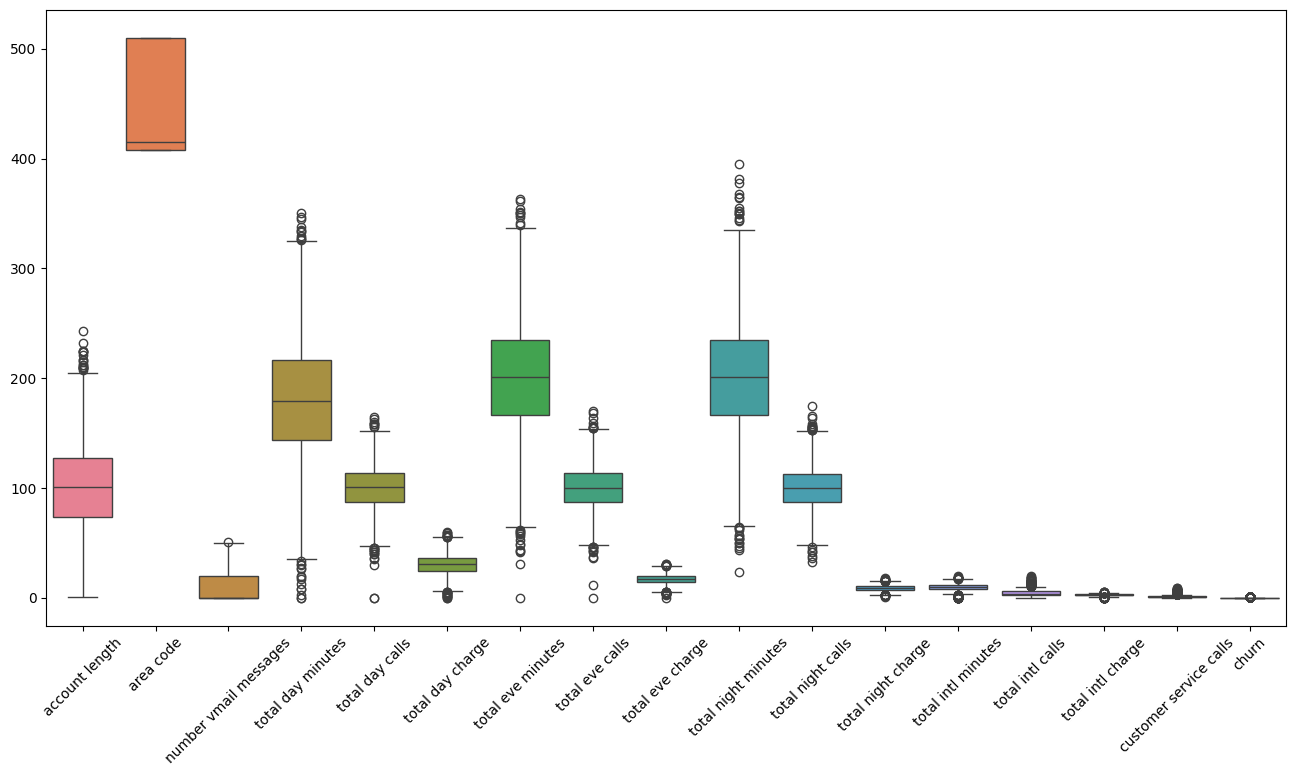

In [119]:
# visualize outliers
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

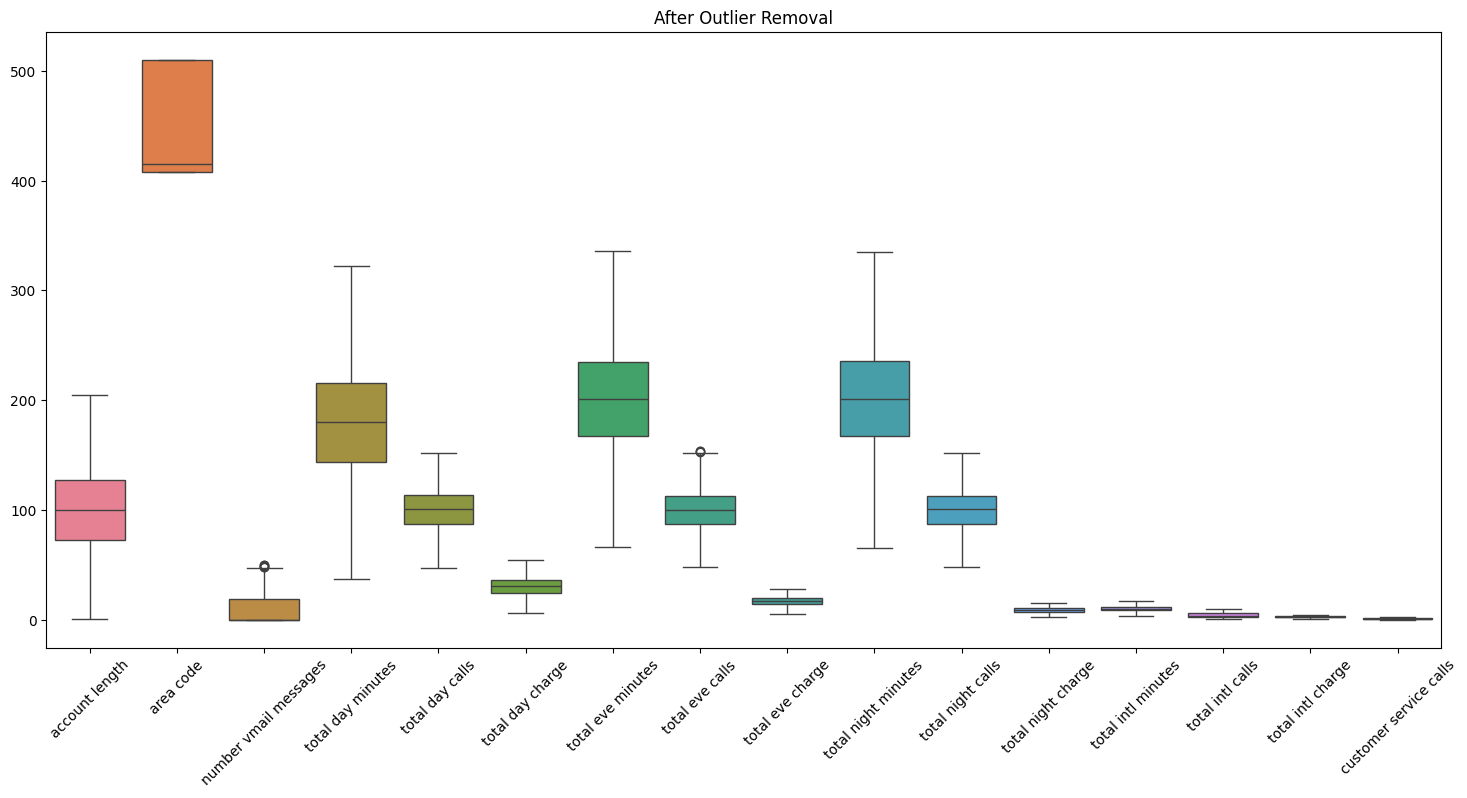

In [120]:
# remove Outliers
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df
# Apply IQR-based outlier removal
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# plot figure size
plt.figure(figsize=(18, 8))
# Visualize plot after cleaning
sns.boxplot(data=df_cleaned[numerical_cols], orient="v")
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

In [121]:
df_cleaned.shape

(2797, 21)

The number of columns after outlier cleaning has reduced from 3333 to 2797. Close to 18 % percent of the original data set has been cleaned off

In [122]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Feature engineering

---

Creating total_calls, total_minutes, and total_charge allows better understanding of overall customer behavior, simplifies the churn analysis and strengthens predictive model, through identification, engagement, and retantion of at-risk customers. For example;

              1. By Identifying High-Usage Customers (Potential Upselling Opportunity)the organization can offer personalized plans or incentives to retain them.
              2. By detecting Billing & Cost Concerns (Churn Triggers) the organization can offer better discounts, loyalty perks, or suggest better cost-efficient plans.
              3. By spotting Unusual Activity Patterns Proactively reach out to such customers with customized offers before they churn.
              4. By building a stronger Churn Prediction Model the organiztion can Train models using  new features to improve churn prediction!


In [123]:
df_cleaned["total_minutes"] = df_cleaned["total day minutes"] + df_cleaned["total eve minutes"] + df_cleaned["total night minutes"] + df_cleaned["total intl minutes"]
df_cleaned["total_calls"] = df_cleaned["total day calls"] +df_cleaned["total eve calls"] + df_cleaned["total night calls"] + df_cleaned["total intl calls"]
df_cleaned["total_charge"] = df_cleaned["total day charge"] + df_cleaned["total eve charge"] + df_cleaned["total night charge"] + df_cleaned["total intl charge"]

In [124]:
df_cleaned["avg_minutes_per_call"] = df_cleaned["total_minutes"] / df_cleaned["total_calls"]
df_cleaned["avg_charge_per_minute"] = df_cleaned["total_charge"] / df_cleaned["total_minutes"]

In [125]:
df_cleaned.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,avg_minutes_per_call,avg_charge_per_minute
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,10.0,3,2.70,1,False,717.2,303,75.56,2.366997,0.105354
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,13.7,3,3.70,1,False,625.2,332,59.24,1.883133,0.094754
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,12.2,5,3.29,0,False,539.4,333,62.29,1.619820,0.115480
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,10.1,3,2.73,3,False,512.0,359,52.09,1.426184,0.101738
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,6.3,6,1.70,0,False,654.2,323,67.61,2.025387,0.103348


In [126]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 3332
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2797 non-null   object 
 1   account length          2797 non-null   int64  
 2   area code               2797 non-null   int64  
 3   phone number            2797 non-null   object 
 4   international plan      2797 non-null   object 
 5   voice mail plan         2797 non-null   object 
 6   number vmail messages   2797 non-null   int64  
 7   total day minutes       2797 non-null   float64
 8   total day calls         2797 non-null   int64  
 9   total day charge        2797 non-null   float64
 10  total eve minutes       2797 non-null   float64
 11  total eve calls         2797 non-null   int64  
 12  total eve charge        2797 non-null   float64
 13  total night minutes     2797 non-null   float64
 14  total night calls       2797 non-null   int64

## Drop more columns


---


There are columns that are neautral to customer behaviour meaning they do not  contribute crucial information to customer behavior for example state, Phone number and area code

In [127]:
# drop columns
df_cleaned.drop(["state", "phone number", "area code"], axis=1, inplace=True)

In [128]:
# drop more colums used in feature engineering
drop_cols = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes",
             "total day calls", "total eve calls", "total night calls", "total intl calls",
             "total day charge", "total eve charge", "total night charge", "total intl charge"]

df_cleaned.drop(columns=drop_cols, inplace=True)


In [129]:
df_cleaned["engagement_score"] = df_cleaned["voice mail plan"] * 2 + df_cleaned["international plan"] * 3 + df_cleaned["customer service calls"]

TypeError: can only concatenate str (not "int") to str

# Exploratory Data Analysis (EDA)

## Univariate analysis


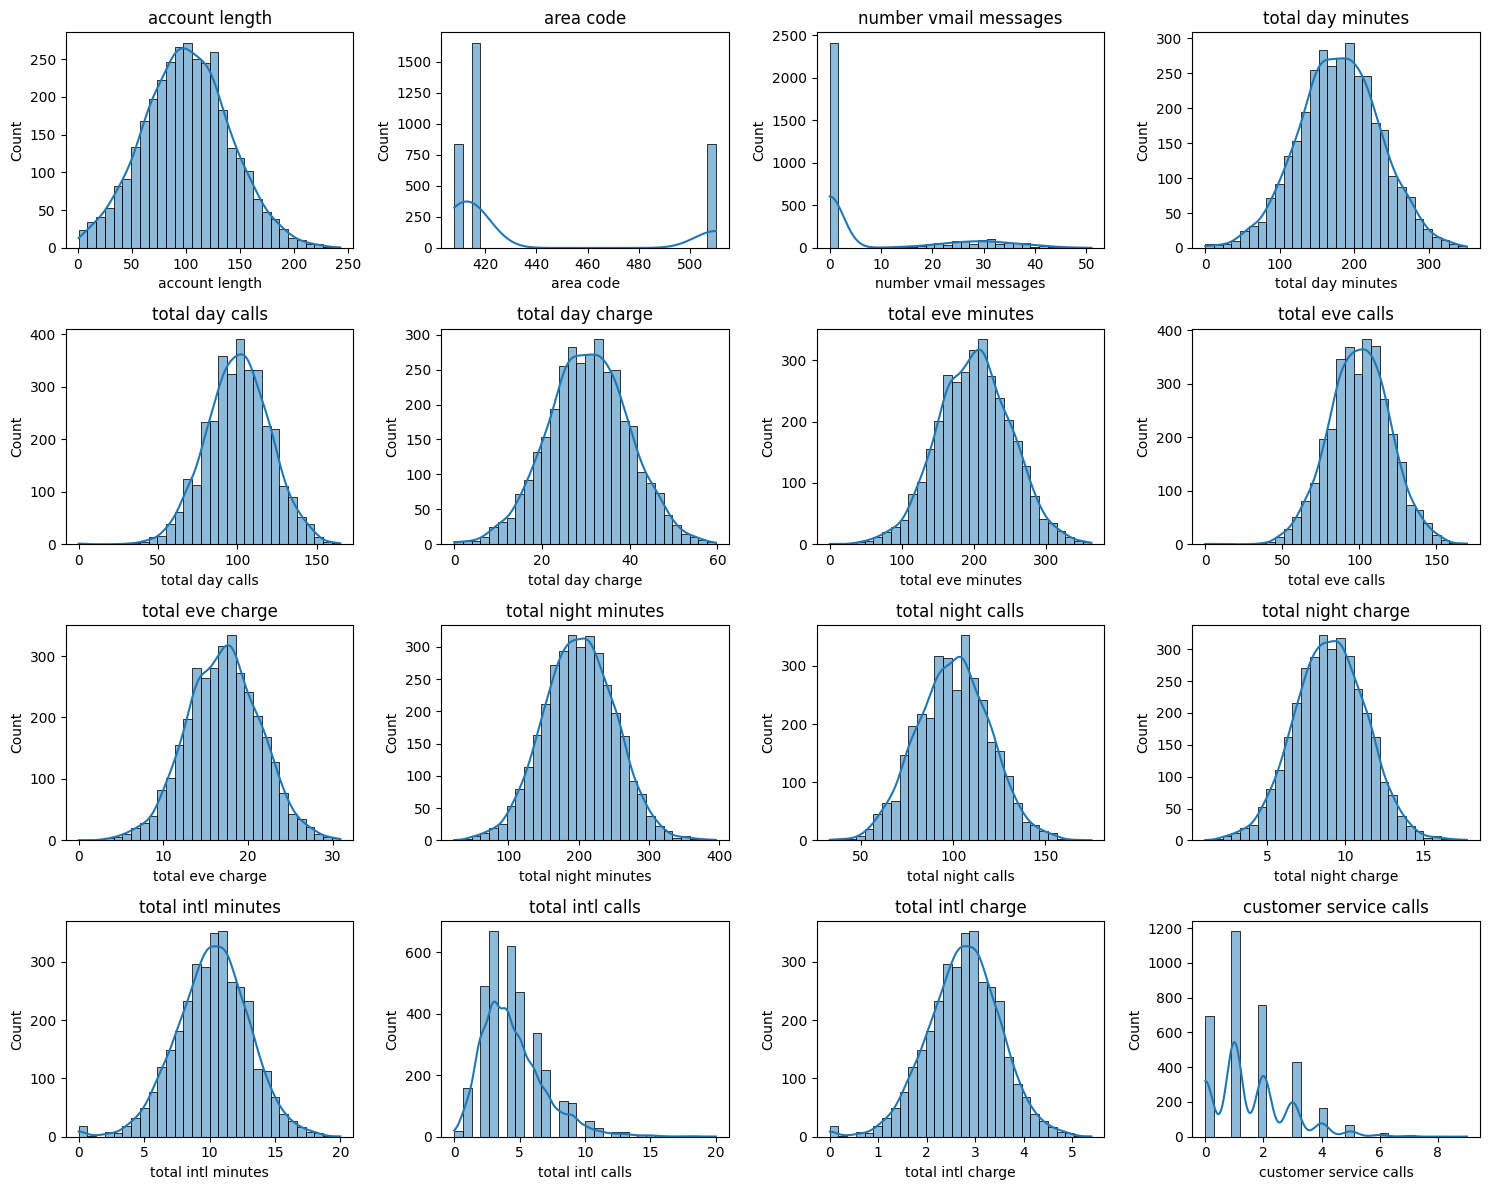

In [130]:
# Univariate analysis of numerical columns
# select Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

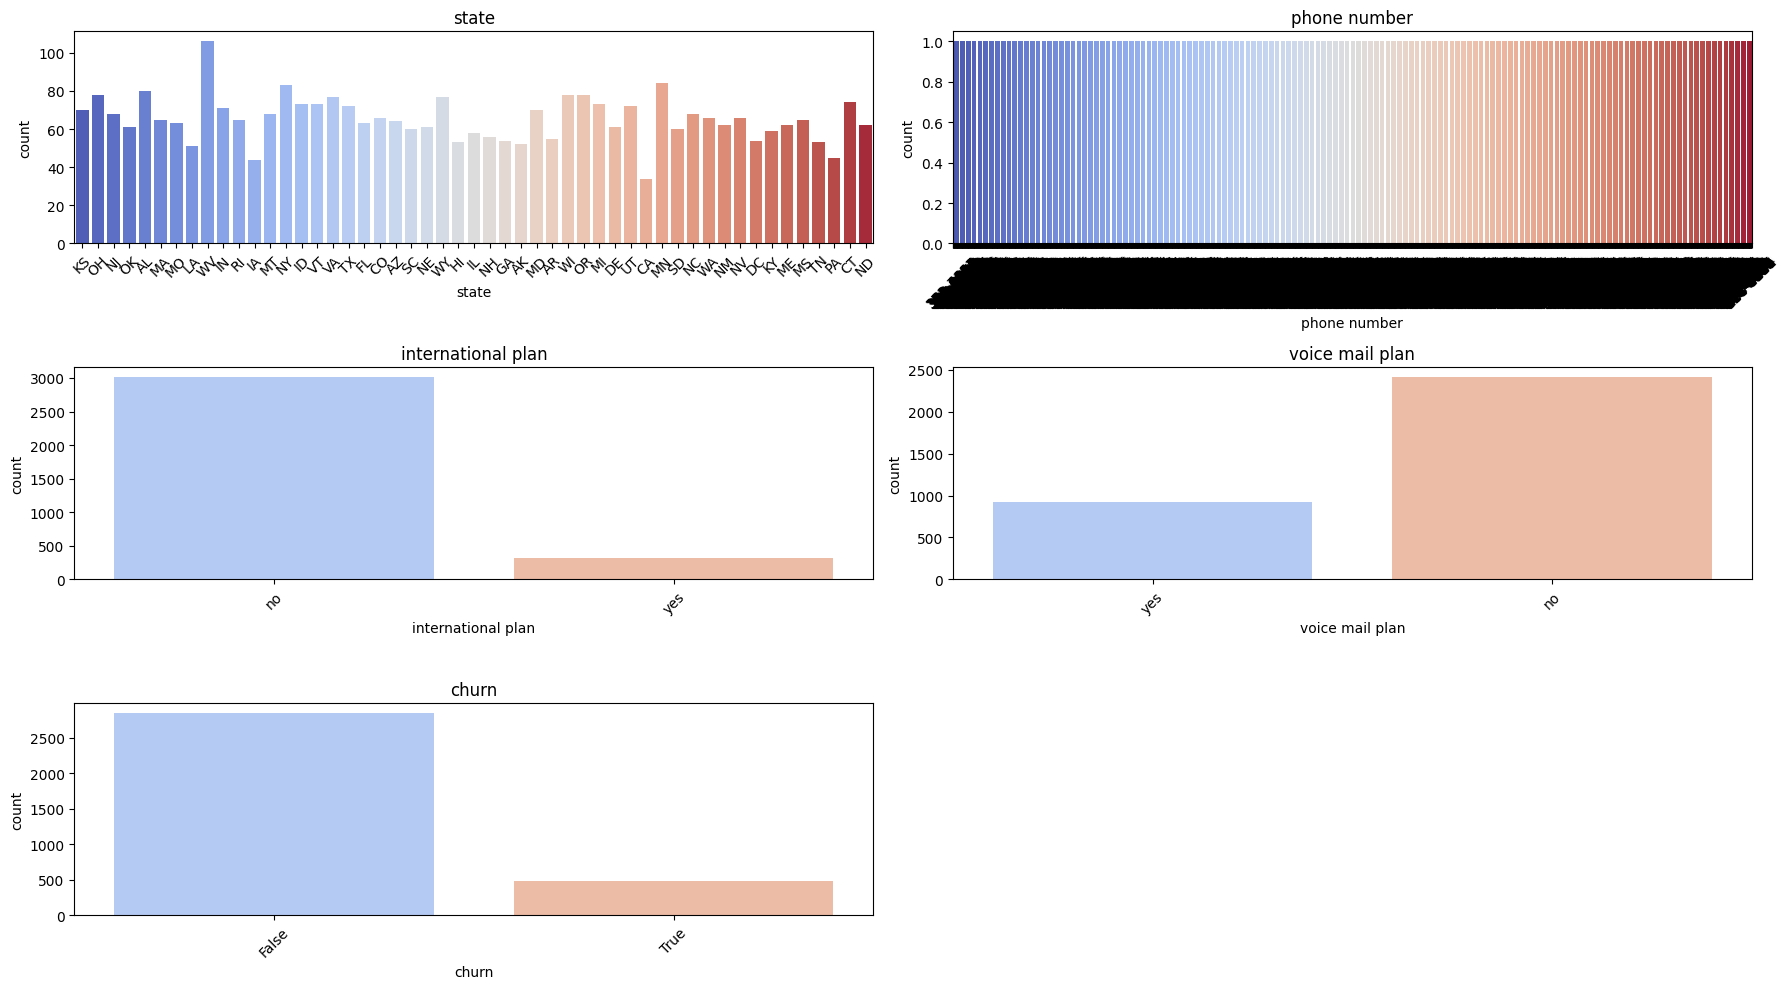

In [131]:
# Univariate analysis for categorical columns
# define and select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate analysis


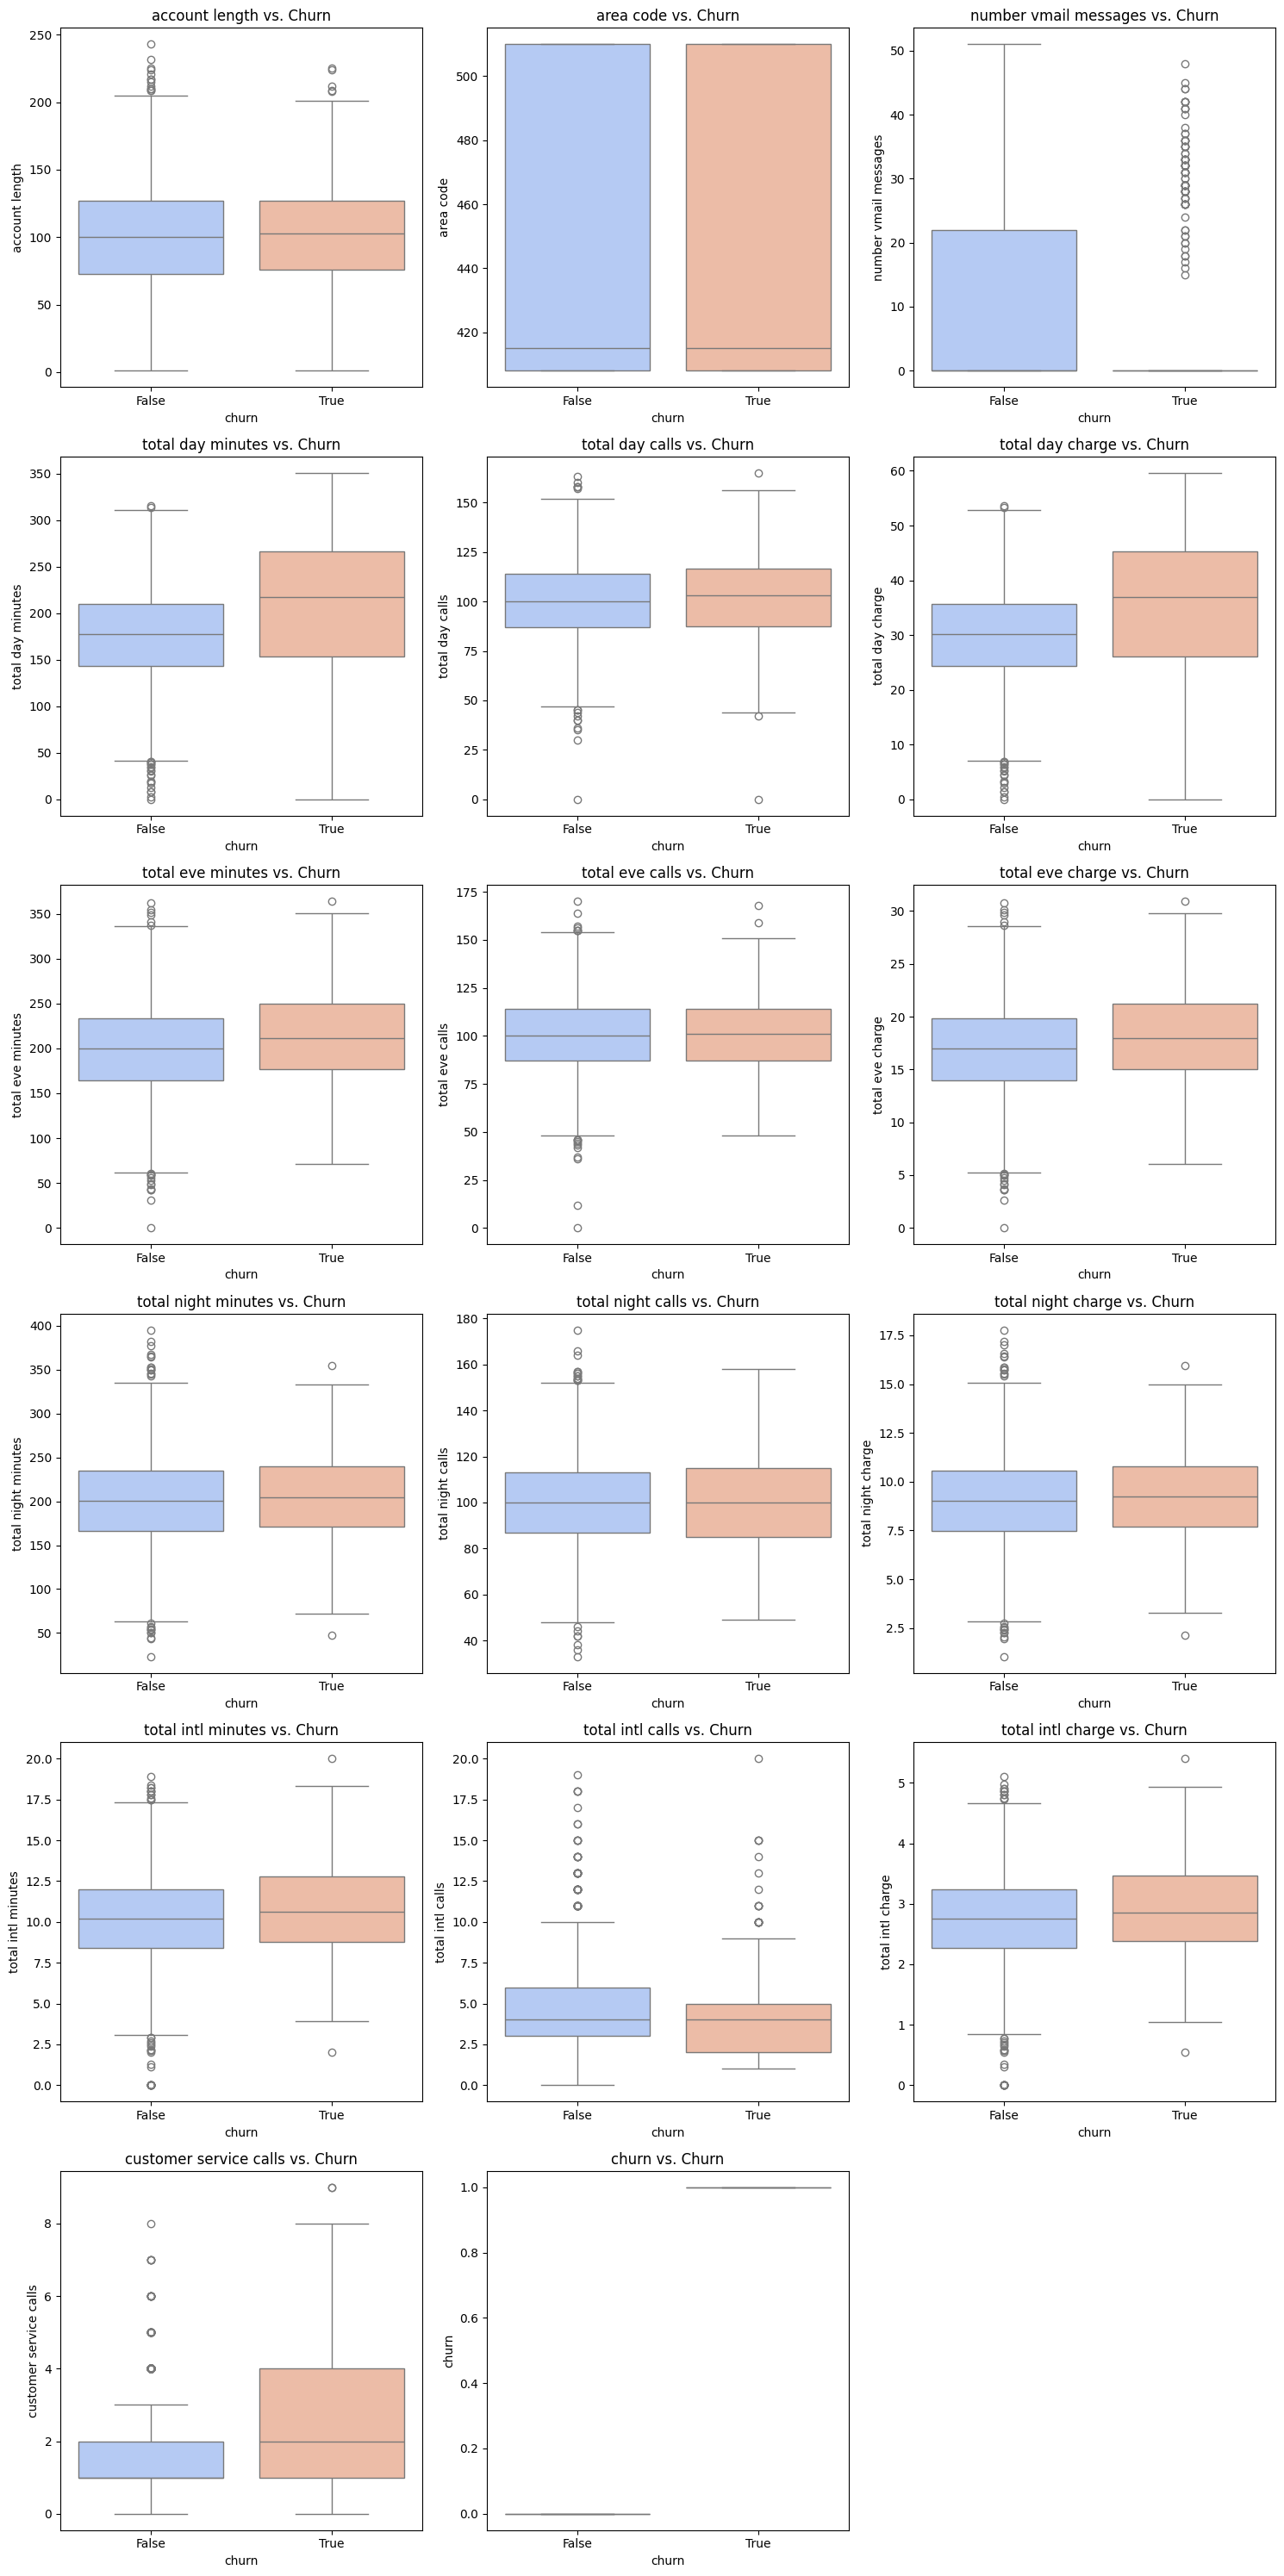

In [132]:
# Define numerical columns
numerical_cols = [
    "account length", "area code", "number vmail messages", "total day minutes",
    "total day calls", "total day charge", "total eve minutes", "total eve calls",
    "total eve charge", "total night minutes", "total night calls", "total night charge",
    "total intl minutes", "total intl calls", "total intl charge", "customer service calls", "churn"
]
# Adjust the grid size dynamically based on number of plots
rows = (len(numerical_cols) // 3) + 1  # Adjust rows automatically

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df["churn"], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs. Churn")

plt.tight_layout()
plt.show()

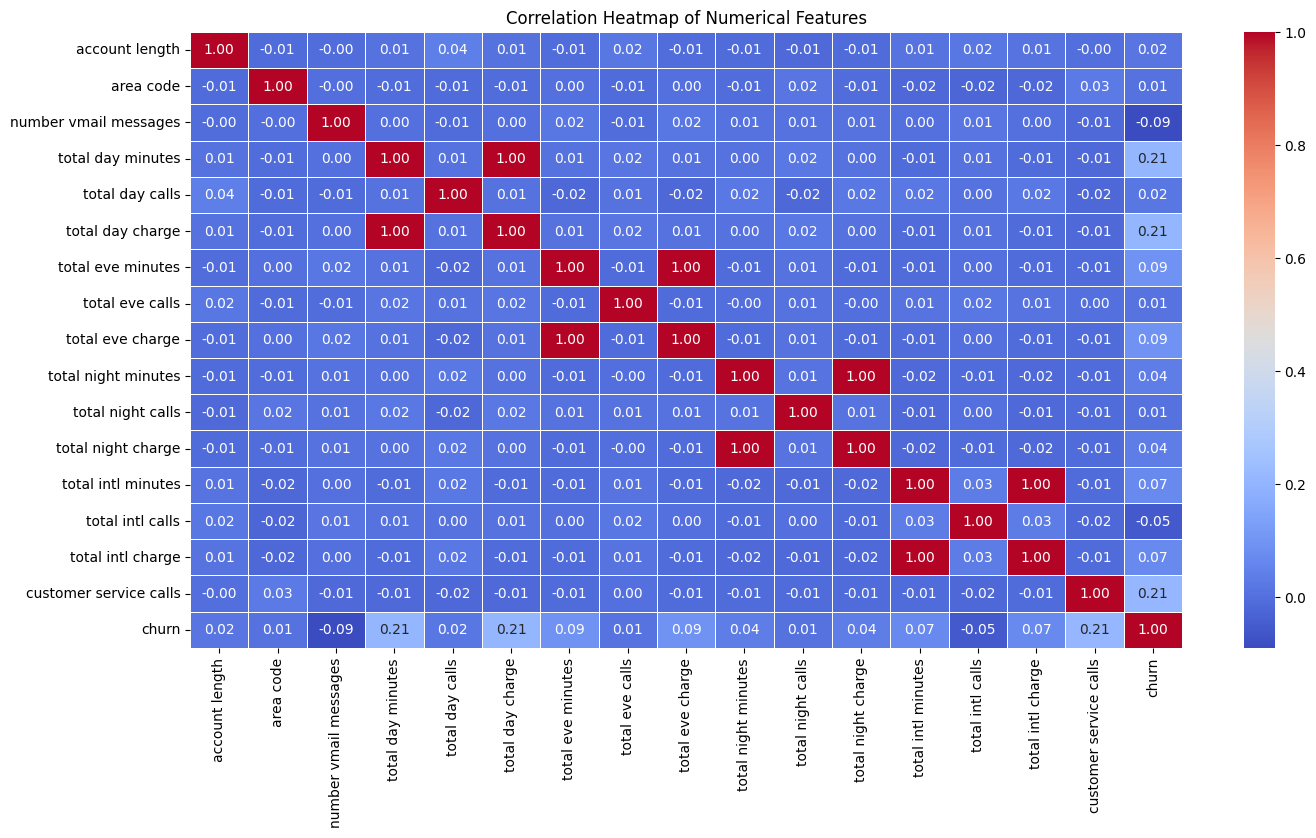

In [133]:
# figure size
plt.figure(figsize=(16, 8))

# correlation matrix
corr_matrix = df[numerical_cols].corr()

# visualize heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

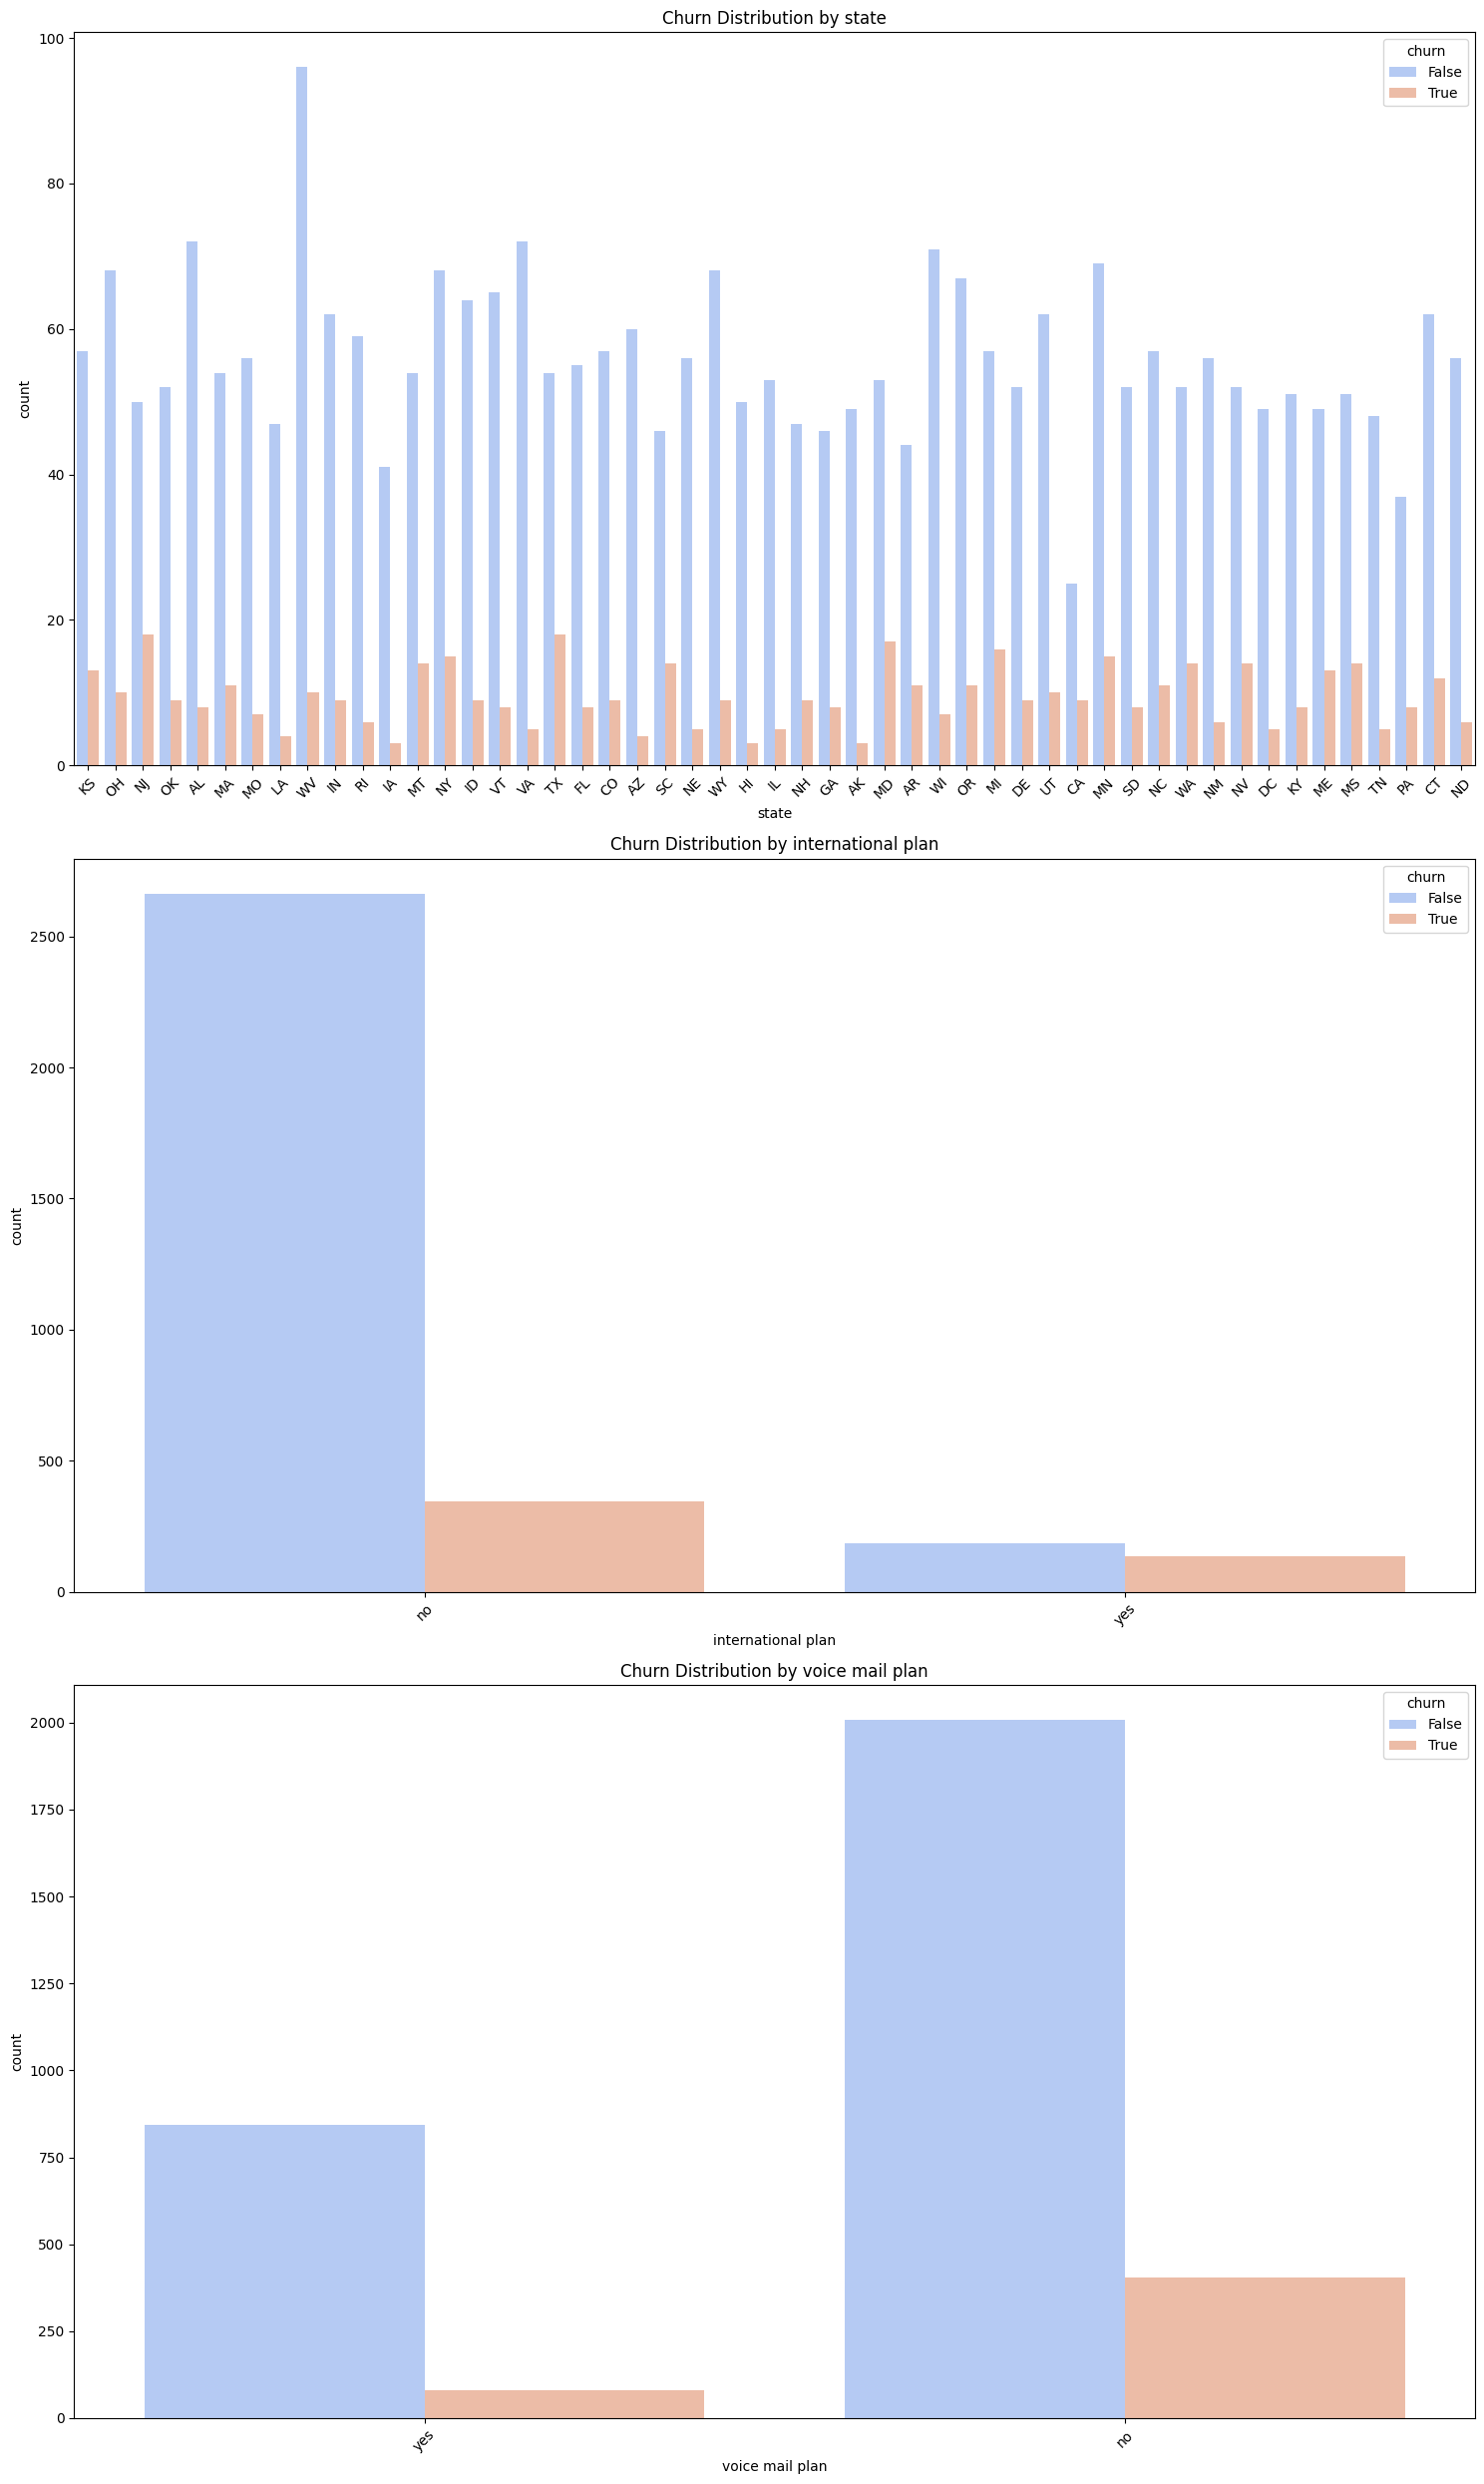

In [134]:
# define categorical columns
categorical_cols = ["state", "international plan", "voice mail plan"]

# figure size
plt.figure(figsize=(15, 25))
#
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=df[col], hue=df["churn"], palette="coolwarm")
    plt.title(f"Churn Distribution by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Multivariate analysis

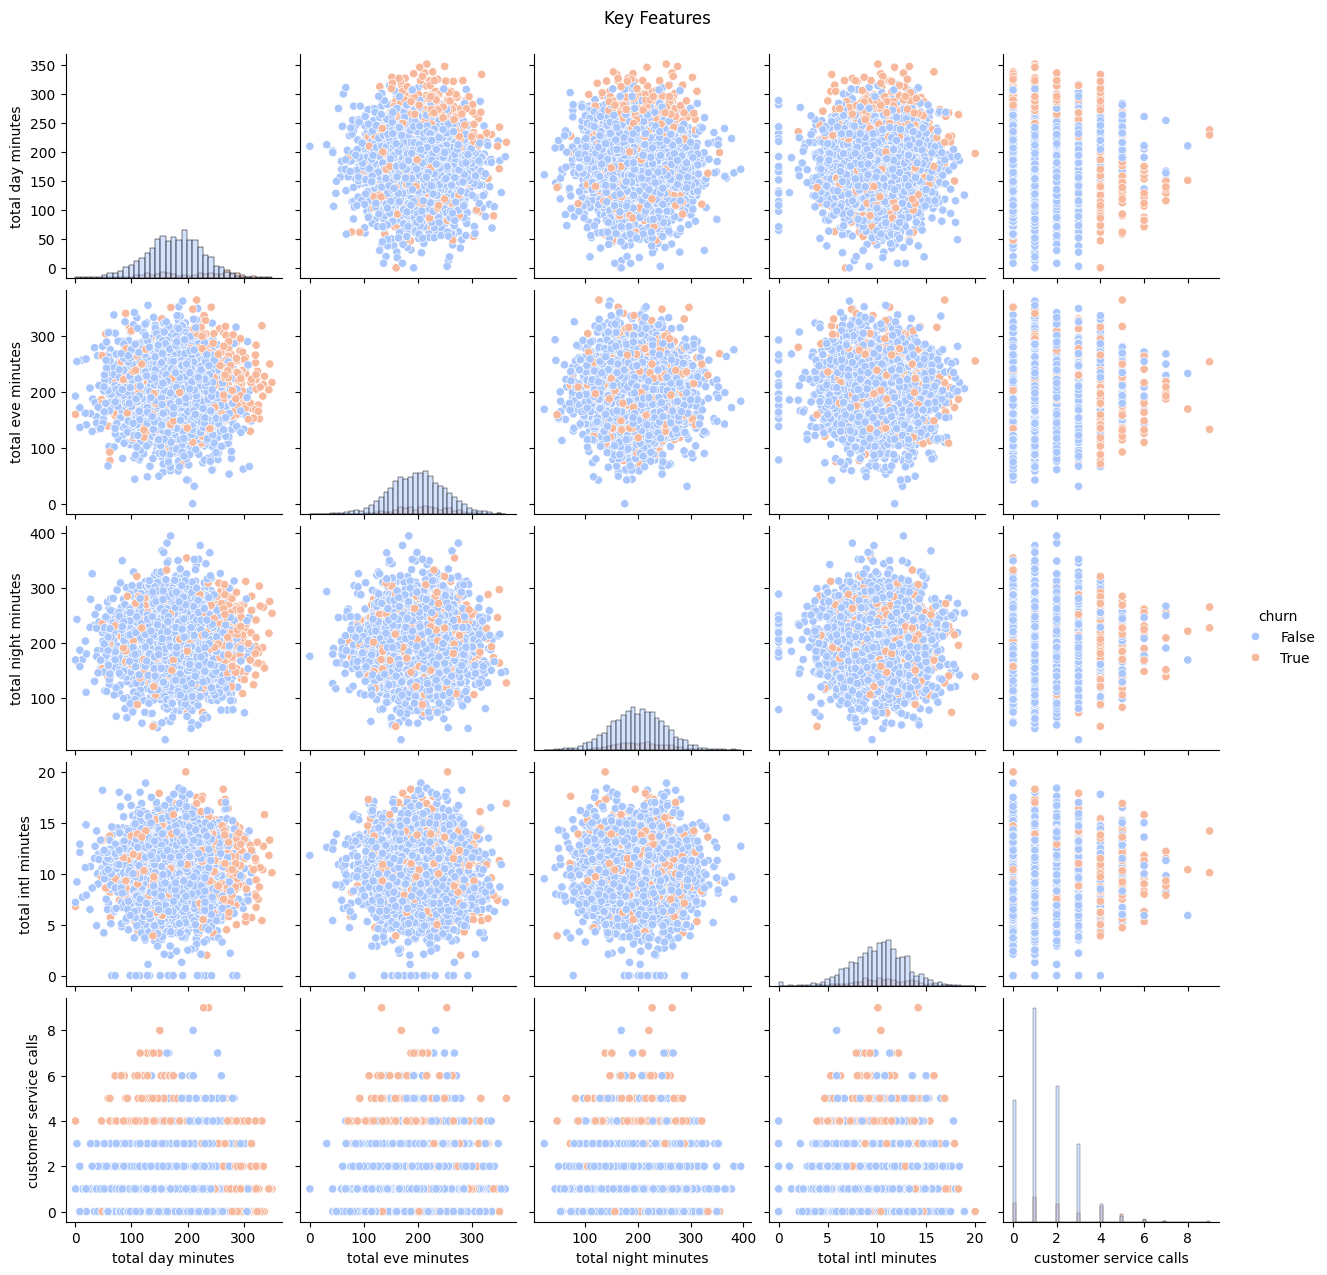

In [135]:
# Select relevant numerical columns
multivariate_cols = ["total day minutes", "total eve minutes", "total night minutes",
                     "total intl minutes", "customer service calls", "churn"]

# Pairplot to analyze relationships
sns.pairplot(df[multivariate_cols], hue="churn", palette="coolwarm", diag_kind="hist")
plt.suptitle("Key Features", y=1.02)
plt.show()

#Preprocessing

## Encoding


---
Since the state column was dropped, label encoding will be used to convert the yes /no values in voicemail plan, international plan.

The target variable will be excluded to retain its original format essential for classification.


In [136]:
df_cleaned["international plan"] = df_cleaned["international plan"].map({"yes": 1, "no": 0})
df_cleaned["voice mail plan"] = df_cleaned["voice mail plan"].map({"yes": 1, "no": 0})


In [137]:
df_cleaned.head()

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_minutes,total_calls,total_charge,avg_minutes_per_call,avg_charge_per_minute
0,128,0,1,25,1,False,717.2,303,75.56,2.366997,0.105354
1,107,0,1,26,1,False,625.2,332,59.24,1.883133,0.094754
2,137,0,0,0,0,False,539.4,333,62.29,1.619820,0.115480
4,75,1,0,0,3,False,512.0,359,52.09,1.426184,0.101738
5,118,1,0,0,0,False,654.2,323,67.61,2.025387,0.103348


In [138]:
df_cleaned["engagement_score"] = df_cleaned["voice mail plan"] * 2 + df_cleaned["international plan"] * 3 + df_cleaned["customer service calls"]

## scaling

In [139]:
# Define numerical columns for scaling
numerical_cols = [
    "account length", "number vmail messages", "customer service calls",
    "total_minutes", "total_calls", "total_charge",
    "avg_minutes_per_call", "avg_charge_per_minute", "engagement_score"
]

# Used Standard Scaling (Z-Score Normalization) since its more stable and widely used
standard_scaler = StandardScaler()
df_cleaned_standard_scaled = df_cleaned.copy()
df_cleaned_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df_cleaned[numerical_cols])

In [140]:
df_cleaned.head()

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_minutes,total_calls,total_charge,avg_minutes_per_call,avg_charge_per_minute,engagement_score
0,128,0,1,25,1,False,717.2,303,75.56,2.366997,0.105354,3
1,107,0,1,26,1,False,625.2,332,59.24,1.883133,0.094754,3
2,137,0,0,0,0,False,539.4,333,62.29,1.619820,0.115480,0
4,75,1,0,0,3,False,512.0,359,52.09,1.426184,0.101738,6
5,118,1,0,0,0,False,654.2,323,67.61,2.025387,0.103348,3


## Handle class imbalance

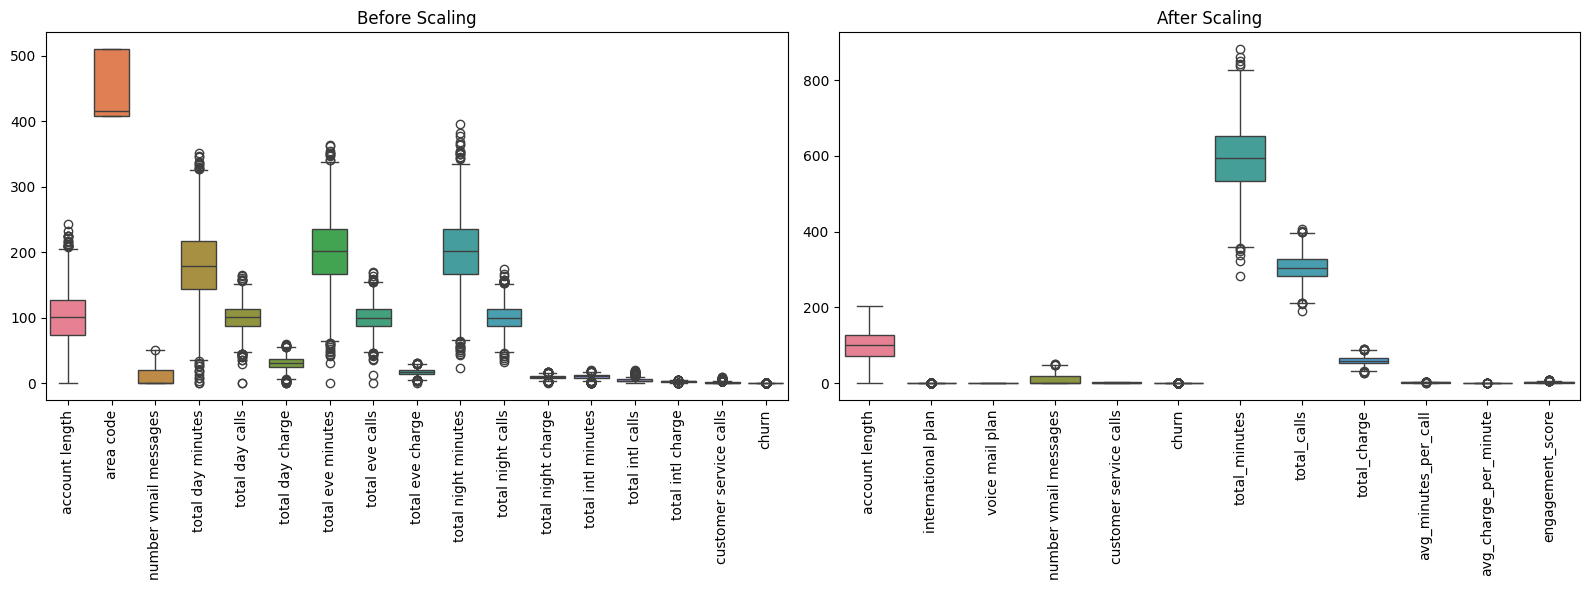

In [141]:
# Plot the dataset before and after scaling
plt.figure(figsize=(16, 6))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title("Before Scaling")
plt.xticks(rotation=90)

# After scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("After Scaling")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Modelling

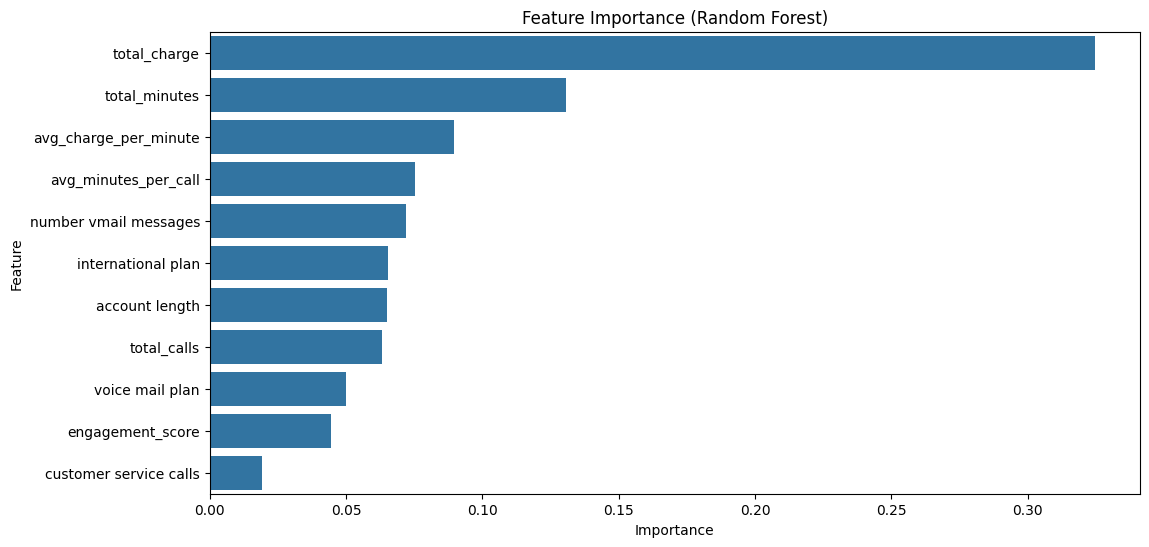

In [156]:
X = df_cleaned.drop(columns=["churn"])  # Features
y = df_cleaned["churn"]  # Target

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [159]:
# Use Logistic Regression for Feature Selection
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Keep the top 10 important features
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'customer service calls', 'total_calls',
       'total_charge', 'avg_minutes_per_call', 'avg_charge_per_minute',
       'engagement_score'],
      dtype='object')


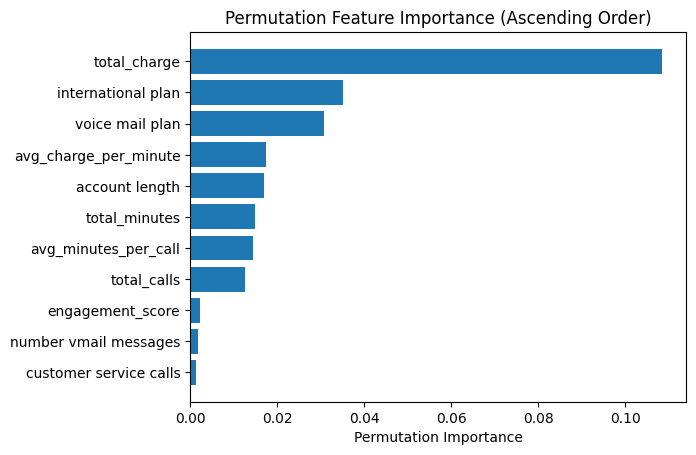

In [183]:
from sklearn.inspection import permutation_importance

# The model is already trained
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Get feature importance
importance = result.importances_mean

# Sort features based on importance in ascending order
sorted_idx = importance.argsort()

# Plotting in ascending order
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance (Ascending Order)')
plt.show()

## Logistic regression

In [161]:
# select independent variables/features
selected_features = [
    'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'customer service calls', 'total_calls',
       'total_charge', 'avg_minutes_per_call', 'avg_charge_per_minute',
       'engagement_score'
]

# Define X (features) and y (target)
X = df_cleaned[selected_features]  # theses are Scaled features
y = df_cleaned["churn"]  # Target/Dependent variable

# Split into dataset into (80%) training  and (20%)testing  sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (2237, 10)
Testing Set Shape: (560, 10)


In [162]:
# define model
model = LogisticRegression()

# Train on scaled features
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Model Accuracy_lr: {accuracy_lr:.2f}")  # Fixed f-string

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy_lr: 0.89

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94       490
        True       0.71      0.21      0.33        70

    accuracy                           0.89       560
   macro avg       0.81      0.60      0.64       560
weighted avg       0.88      0.89      0.86       560


Confusion Matrix:
 [[484   6]
 [ 55  15]]


The Model accuracy The model is great at identifying customers who won't churn but our interest is in the churners which the model fails to detect.


---


The model is struggling to correctly detect churners.
The confusion matrix actually indicates that out of 70 actual churners, only 9 were correctly identified and 61 churners were incorrectly classified as non-churners.


---

The model is missing most churners it only finds 13% meaning that when the model predicts a churn, it’s often wrong.

This can lead to a high customer loss risk


In [163]:
# apply smote to the training data
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [164]:
# Initialize the classifier
logreg = LogisticRegression()

# Train on SMOTE-resampled data
logreg.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8196428571428571
Confusion Matrix:
 [[411  79]
 [ 22  48]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.84      0.89       490
        True       0.38      0.69      0.49        70

    accuracy                           0.82       560
   macro avg       0.66      0.76      0.69       560
weighted avg       0.88      0.82      0.84       560



Recall for churners significantly improved from approximately 13% to 73%   before SMOTE.The model now correctly identifies more churners, but at the cost of lower precision where there are more false positives.

Overall accuracy dropped slightly (79% vs. 88%), but balanced performance matters more in imbalanced datasets.

The model is correct 90% of the time, which is good. However the model had a has a churn problem. No churn predictions range from Precison of 91% to recall of 98% . While the churn predictionsare ranging from 31%, 44% and 73% which  are very low despite tuning

The confusion matrix  misclassified 10 as Churn and missclassified 48 as no church when in essence are churn.

## Decision Tree

In [165]:
# decision tree
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')

# Train on scaled features
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [166]:
# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.92      0.94       490
        True       0.57      0.71      0.63        70

    accuracy                           0.90       560
   macro avg       0.76      0.82      0.79       560
weighted avg       0.91      0.90      0.90       560


Confusion Matrix:
 [[452  38]
 [ 20  50]]


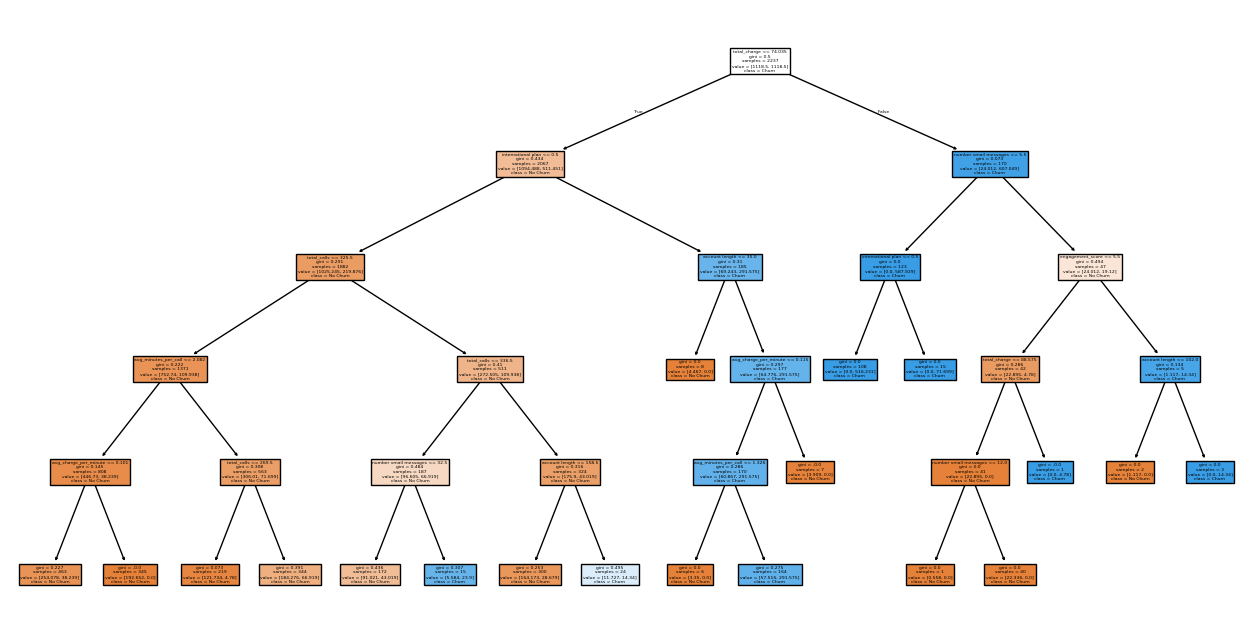

In [167]:
plt.figure(figsize=(16, 8))
plot_tree(dt_model, feature_names=X_train.columns, class_names=["No Churn", "Churn"], filled=True)
plt.show()

In [168]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test)
print("\nBest Decision Tree Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Decision Tree Confusion Matrix:\n",confusion_matrix (y_test, y_pred_best))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95       490
        True       0.61      0.77      0.68        70

    accuracy                           0.91       560
   macro avg       0.79      0.85      0.82       560
weighted avg       0.92      0.91      0.91       560

Best Decision Tree Confusion Matrix:
 [[456  34]
 [ 16  54]]


In [169]:
# Initialize Random Forest with optimized parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluation scores
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.925

 Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       490
        True       0.85      0.49      0.62        70

    accuracy                           0.93       560
   macro avg       0.89      0.74      0.79       560
weighted avg       0.92      0.93      0.92       560


 Random Forest Confusion Matrix:
 [[484   6]
 [ 36  34]]


In [170]:
# Initialize XGBoost with default parameters (or tune later)
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("n XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

n XGBoost Accuracy: 0.9303571428571429

 XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       490
        True       0.88      0.51      0.65        70

    accuracy                           0.93       560
   macro avg       0.91      0.75      0.80       560
weighted avg       0.93      0.93      0.92       560


XGBoost Confusion Matrix:
 [[485   5]
 [ 34  36]]


## Hyperparameter Tuning

In [171]:
# Hyperparameter tuning for logistic regression
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and l2
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Apply GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
print("Classification_report:\n", classification_report(y_test, y_pred))

# Generate Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Classification_report:
               precision    recall  f1-score   support

       False       0.90      0.98      0.94       490
        True       0.70      0.27      0.39        70

    accuracy                           0.89       560
   macro avg       0.80      0.63      0.67       560
weighted avg       0.88      0.89      0.87       560

Confusion Matrix:
 [[482   8]
 [ 51  19]]


In [172]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20],          # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples per leaf
    'criterion': ['gini', 'entropy']      # Splitting method
}

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Perform Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluate model
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("\nBest Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy: 0.9285714285714286

Best Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       490
        True       0.89      0.49      0.63        70

    accuracy                           0.93       560
   macro avg       0.91      0.74      0.80       560
weighted avg       0.93      0.93      0.92       560


Best Random Forest Confusion Matrix:
 [[486   4]
 [ 36  34]]


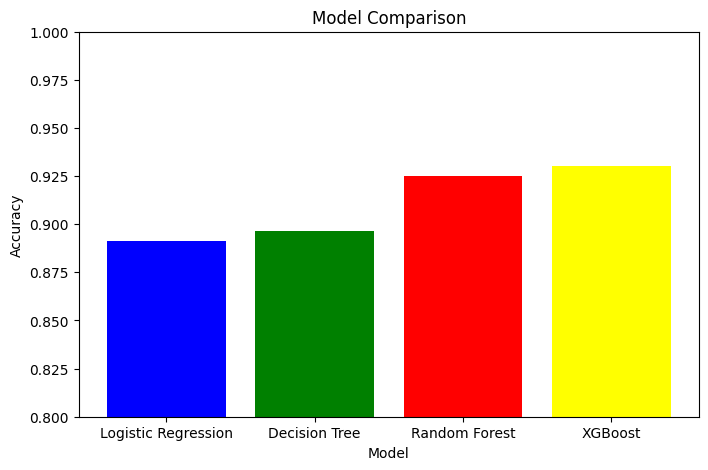

In [173]:
#compare Model performance
models = ["Logistic Regression","Decision Tree", "Random Forest", "XGBoost"]
accuracies = [accuracy_lr, accuracy_dt, accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]

# Create a bar chart to compare accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'Yellow'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.8, 1)  # Adjust based on accuracy range
plt.show()

# Model Evaluation



Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.99      0.94       490
        True       0.62      0.14      0.23        70

    accuracy                           0.88       560
   macro avg       0.76      0.57      0.58       560
weighted avg       0.86      0.88      0.85       560



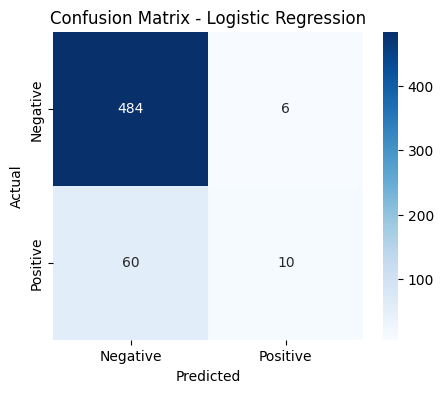


Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       490
        True       0.64      0.54      0.59        70

    accuracy                           0.91       560
   macro avg       0.79      0.75      0.77       560
weighted avg       0.90      0.91      0.90       560



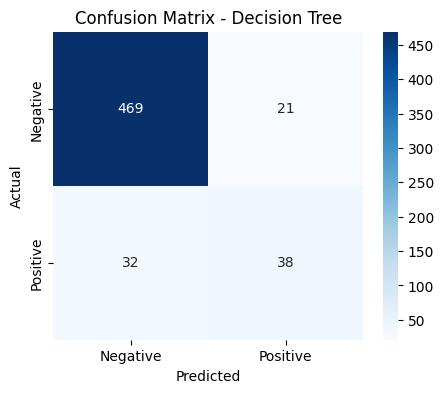


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       490
        True       0.88      0.50      0.64        70

    accuracy                           0.93       560
   macro avg       0.90      0.74      0.80       560
weighted avg       0.93      0.93      0.92       560



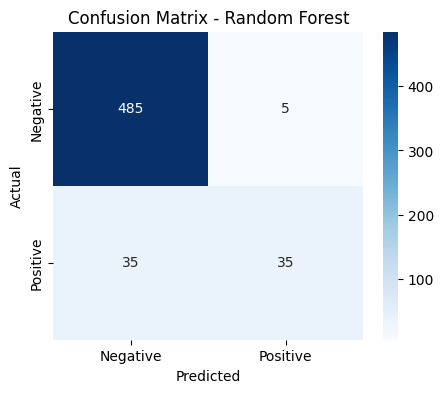


XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.99      0.96       490
        True       0.86      0.54      0.67        70

    accuracy                           0.93       560
   macro avg       0.90      0.77      0.81       560
weighted avg       0.93      0.93      0.93       560



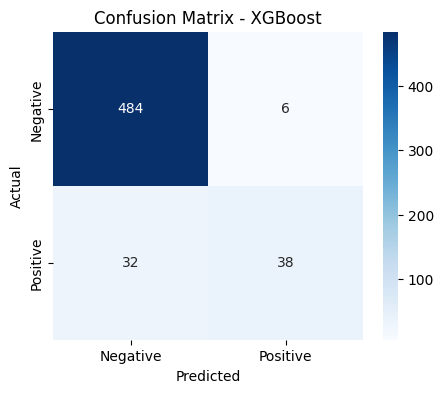


Model Evaluation Results:
                      Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.882143   0.625000  0.142857  0.232558  0.798630
Decision Tree        0.905357   0.644068  0.542857  0.589147  0.750000
Random Forest        0.928571   0.875000  0.500000  0.636364  0.872172
XGBoost              0.932143   0.863636  0.542857  0.666667  0.874869


In [180]:

# Assume target column is 'target' and others are features
X = df_cleaned.drop(columns=['churn'])
y = df_cleaned['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Save results
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC-AUC": roc_auc}

    # Print classification report
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:\n", results_df)

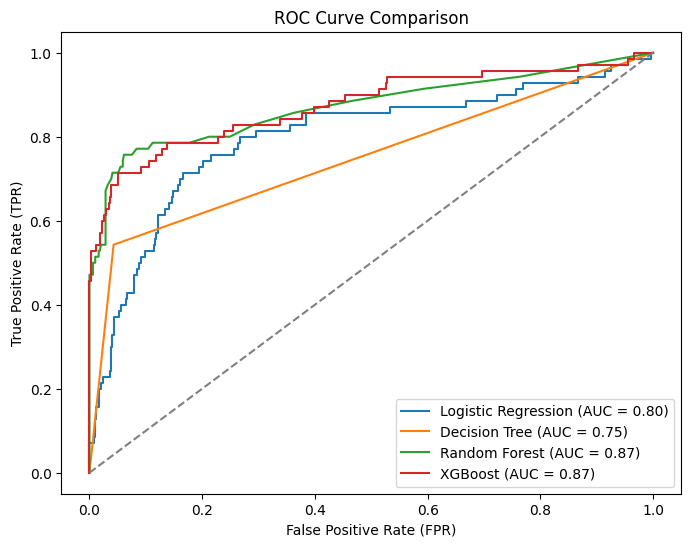

In [181]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# visualize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

The best Model is XGBoost whihas an accuracy of 93.2143%  Precision 86.3636% Recall of 54.2857%  F1 Score  of 66.6667% and  ROC-AUC  of 87.4869

<Figure size 800x500 with 0 Axes>

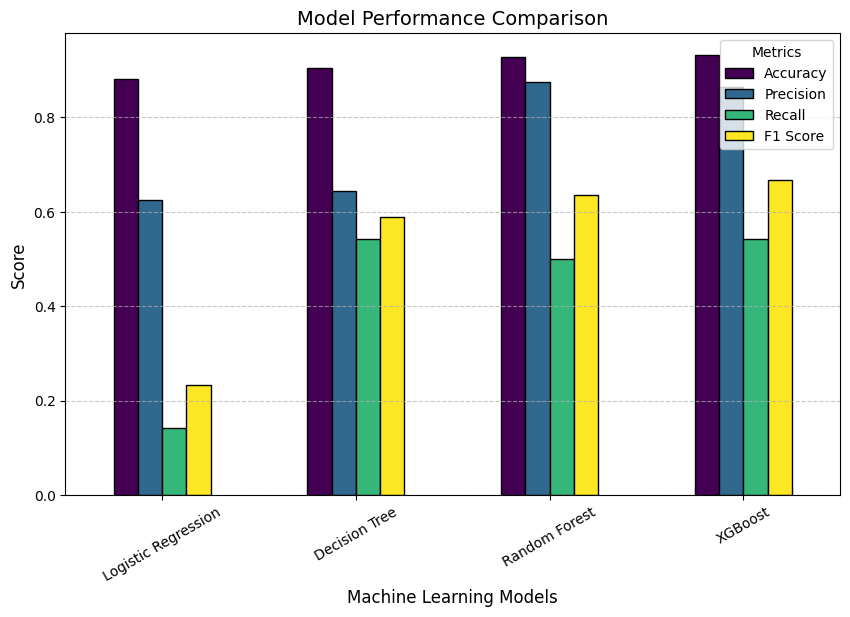

In [184]:
# Model performance metrics
model_results = {
    "Logistic Regression": [0.882, 0.625, 0.143, 0.233],
    "Decision Tree": [0.905, 0.644, 0.543, 0.589],
    "Random Forest": [0.929, 0.875, 0.500, 0.636],
    "XGBoost": [0.932, 0.864, 0.543, 0.667]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T

# Plot
plt.figure(figsize=(8,5))
metrics_df.plot(kind="bar", figsize=(10,6), colormap="viridis", edgecolor='black')

# Labels and title
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Metrics", loc="upper right")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Conclusion and Recommendation

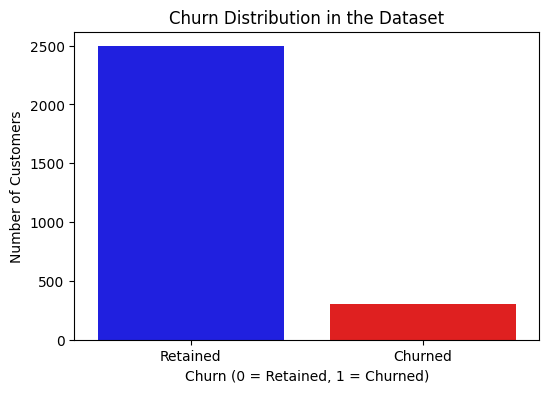

In [185]:
# Assuming 'churn' column contains 1 for churned and 0 for retained customers
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['churn'], palette=['blue', 'red'])

# Add labels
plt.title("Churn Distribution in the Dataset")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0,1], labels=['Retained', 'Churned'])

# Show plot
plt.show()

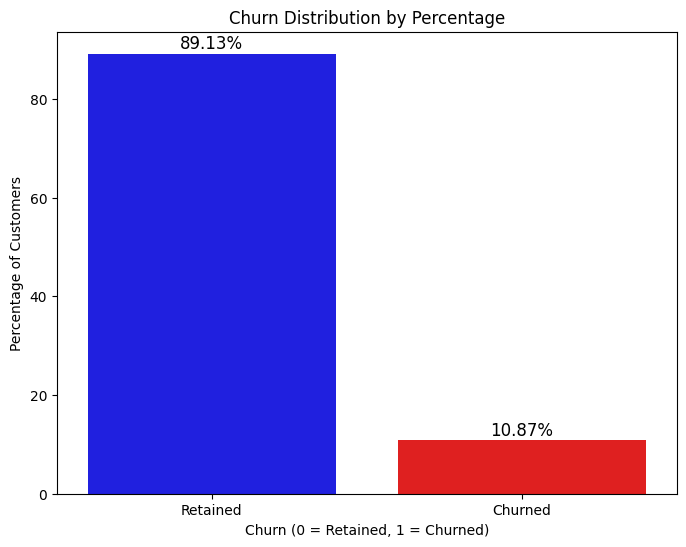

In [188]:
# Calculate percentage of churned vs retained customers
churn_counts = df_cleaned['churn'].value_counts(normalize=True) * 100  # Convert to percentage

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['blue', 'red'])

# Add labels
plt.title("Churn Distribution by Percentage")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Percentage of Customers")
plt.xticks(ticks=[0,1], labels=['Retained', 'Churned'])

# Display percentage values on bars
for i, percentage in enumerate(churn_counts.values):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=12)

# Show plot
plt.show()

# Conclusion
            *   Deploy XGBoost or Random Forest for real-time churn prediction
            *   Monitor customer behavior continuously to update the model with
            new insights
            *   Implement A/B testing to measure the effectiveness of retention
            strategies.
            *   Refine marketing campaigns based on churn predictions to optimize budget allocation

# Recommendations
          1. Integrate the churn prediction model into the company’s CRM
          system for automated alerts.
          2. Develop personalized customer engagement strategies based on
          churn risk levels.
          3. Monitor and improve model performance periodically using
          updated customer data.